In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('laptop_prices.csv')

In [4]:
df.head()


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [5]:
df.shape

(1275, 23)

In [6]:
missing_values = df.isna().sum().sum()

duplicate_values = df.duplicated().sum()

print(f"Missing values: {missing_values}")
print(f"Duplicate rows: {duplicate_values}")

Missing values: 0
Duplicate rows: 0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [8]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


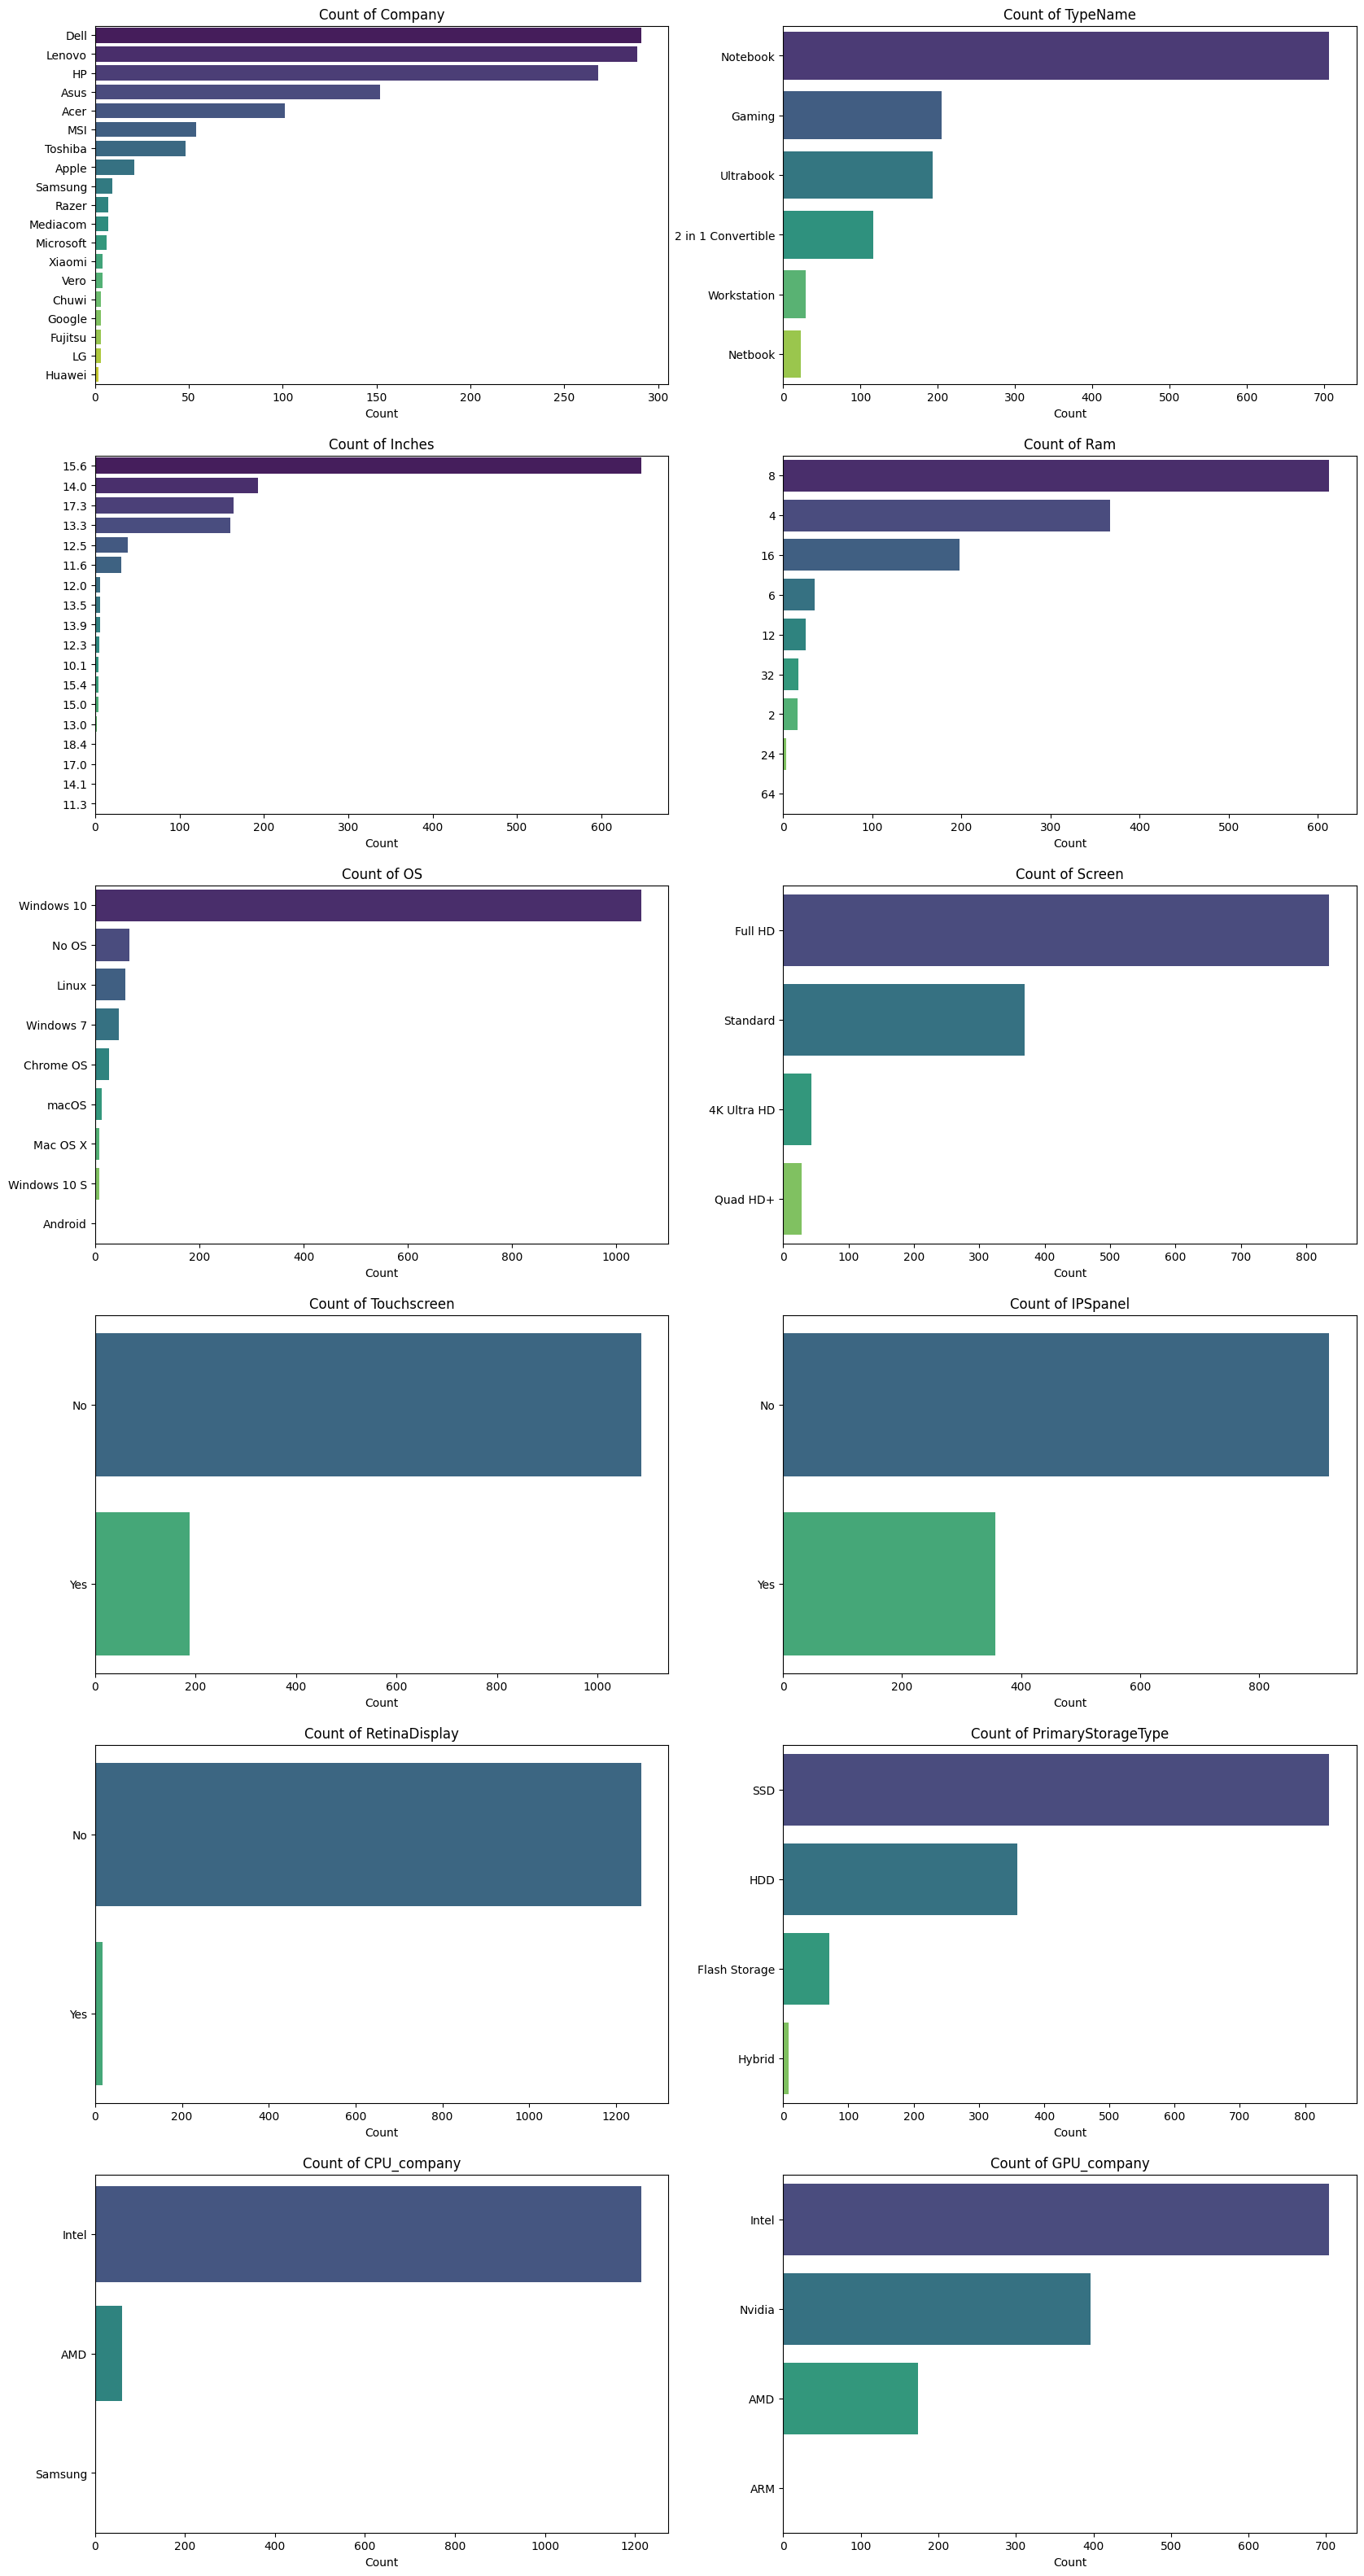

In [9]:
# EDA: Individual Column Count
columns_to_plot = ['Company', 'TypeName', 'Inches', 'Ram', 'OS',"Screen","Touchscreen", 'IPSpanel', 'RetinaDisplay',"PrimaryStorageType","CPU_company","GPU_company"]

fig, axes = plt.subplots(6, 2, figsize=(20, 40))
axes = axes.flatten()


for i, col in enumerate(columns_to_plot):
    sns.countplot(y=col, data=df, ax=axes[i], palette='viridis', order=df[col].value_counts().index)
    axes[i].set_title(f'Count of {col}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('Count')


plt.show()


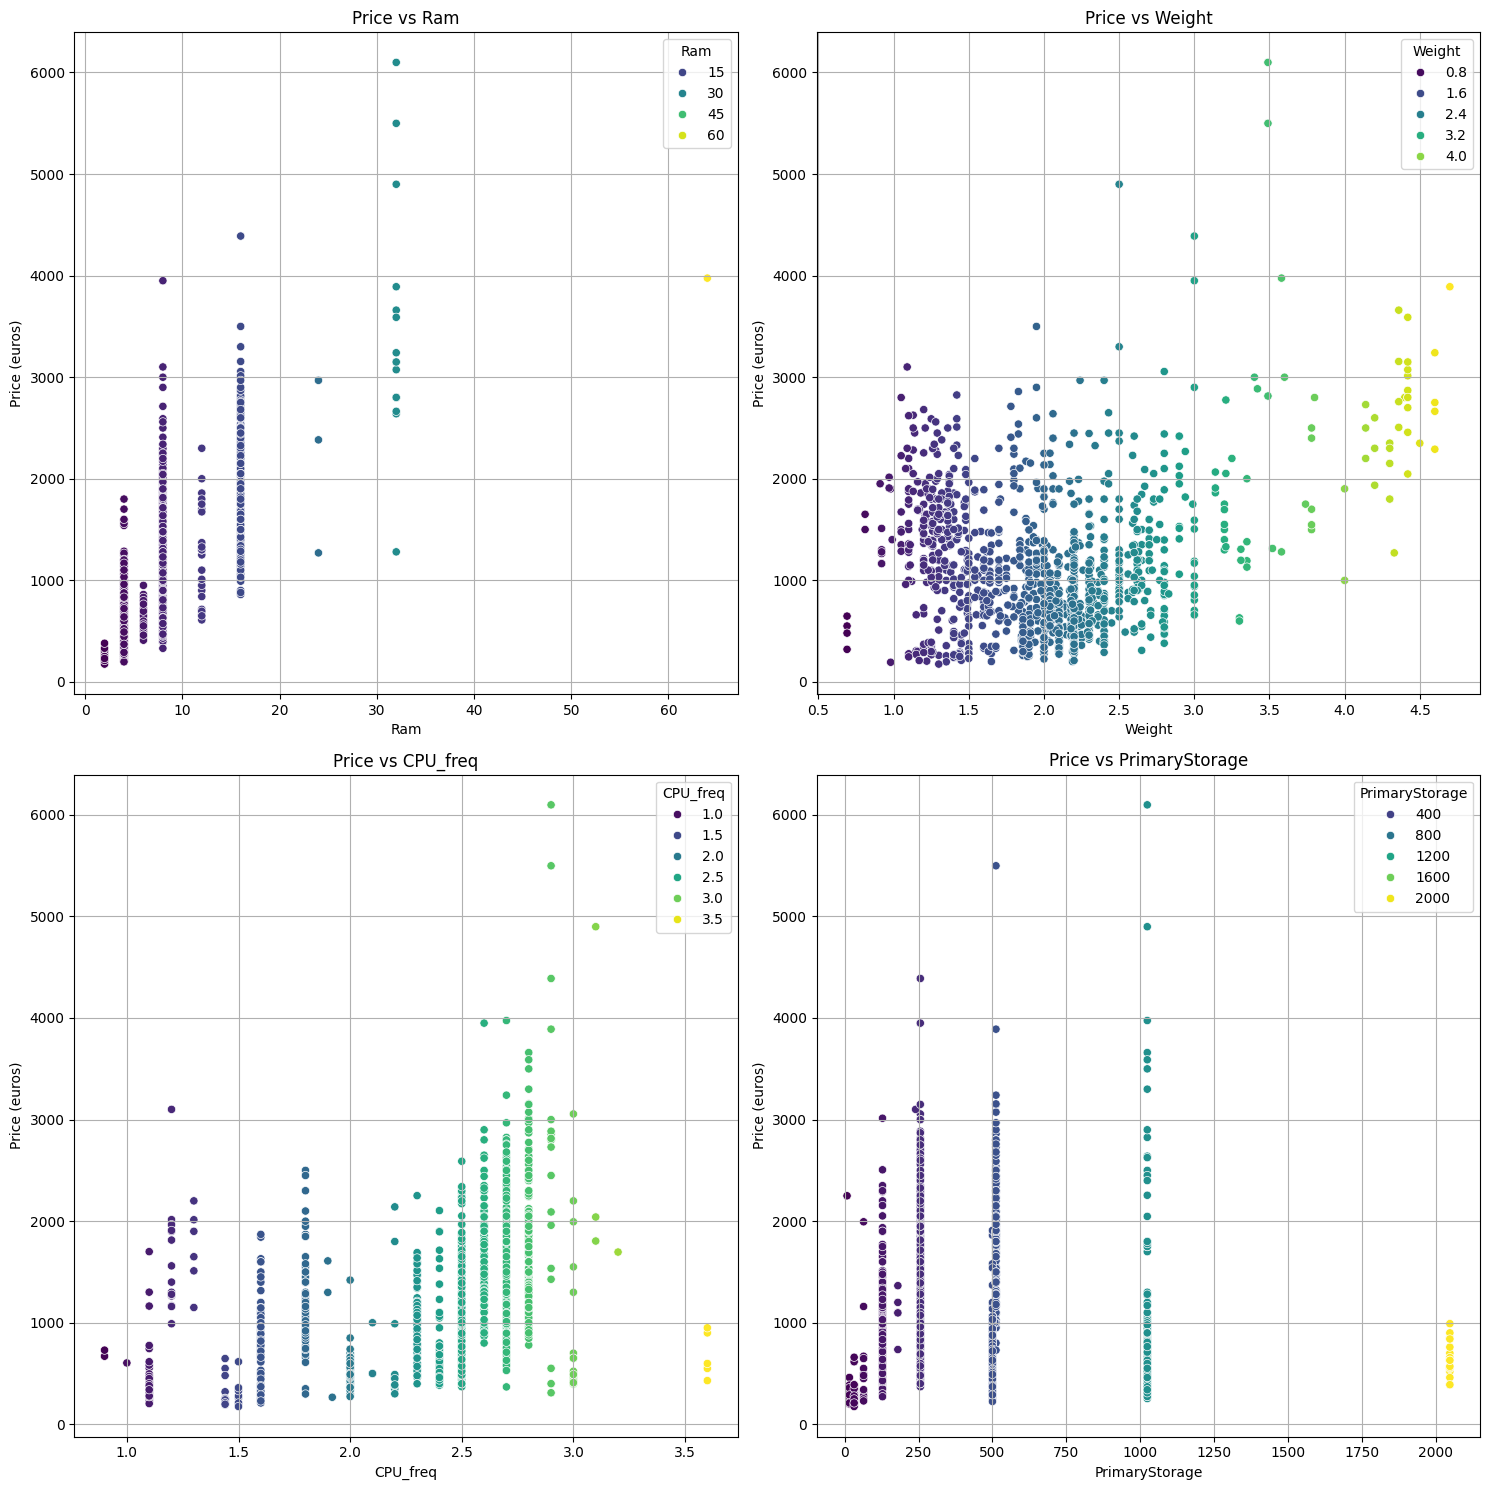

In [15]:
num_features = ['Ram', 'Weight', 'CPU_freq', 'PrimaryStorage']
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

# Set color palette
palette = 'viridis'

# Create scatter plots for each feature
for i, feature in enumerate(num_features):
    sns.scatterplot(data=df, x=feature, y='Price_euros', palette=palette, hue=feature, ax=axes[i])
    axes[i].set_title(f'Price vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price (euros)')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

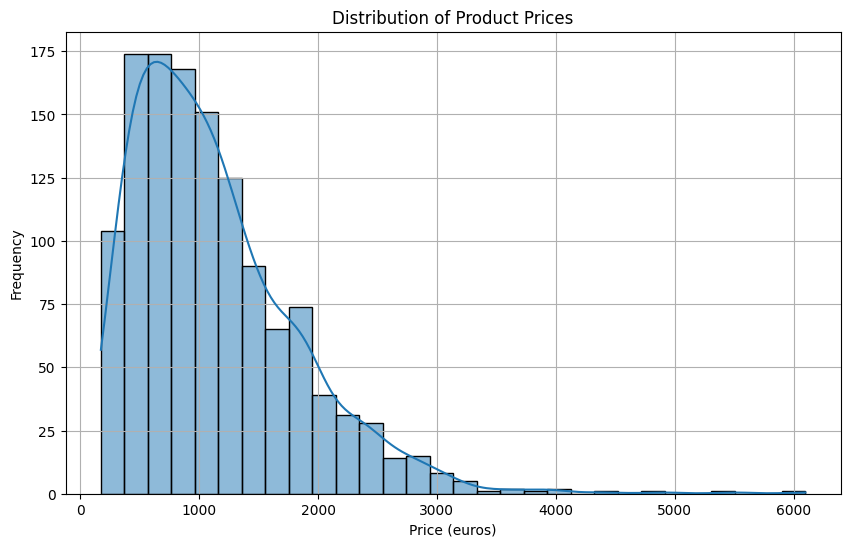

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_euros'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (euros)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

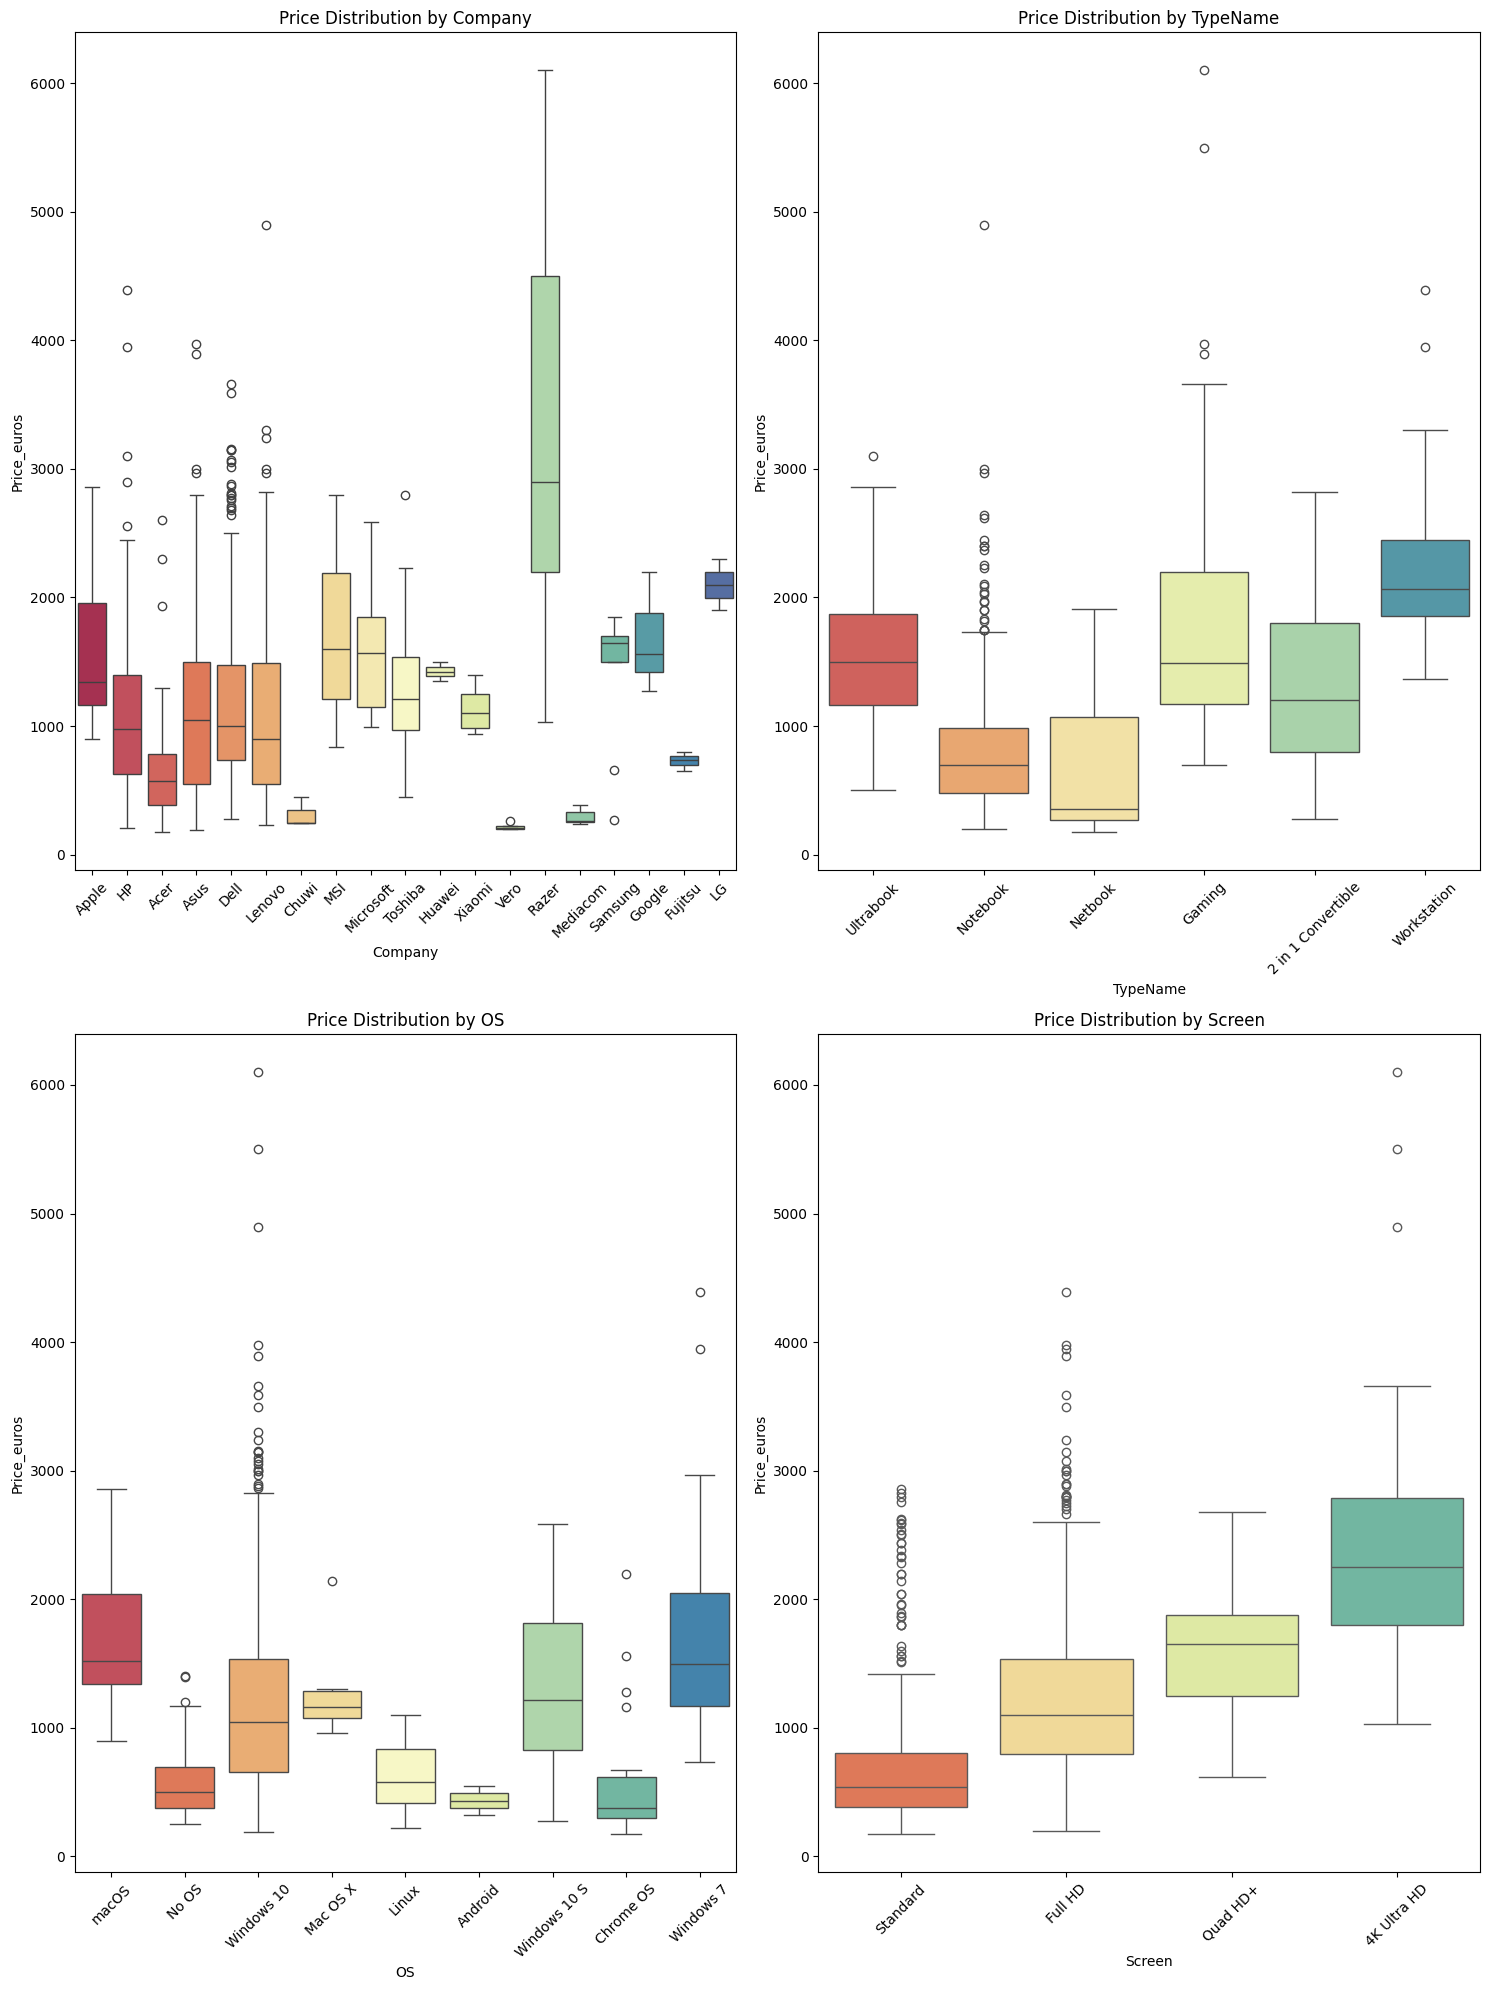

In [12]:
lab_features = ['Company', 'TypeName', 'OS', 'Screen']


fig, axes = plt.subplots(2, 2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(lab_features):
    sns.boxplot(data=df, x=feature, y='Price_euros', palette='Spectral', ax=axes[i])
    axes[i].set_title(f'Price Distribution by {feature}')
    axes[i].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

In [13]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])
    
correlations = df.corr()['Price_euros'].abs().sort_values(ascending=False)
print(correlations)

Price_euros             1.000000
Ram                     0.740287
ScreenW                 0.552491
ScreenH                 0.548529
PrimaryStorageType      0.503655
CPU_model               0.473860
CPU_freq                0.428847
Screen                  0.403834
GPU_company             0.324300
SecondaryStorageType    0.296872
SecondaryStorage        0.291207
OS                      0.290199
IPSpanel                0.250737
Weight                  0.211883
Touchscreen             0.188886
CPU_company             0.177881
Product                 0.142888
GPU_model               0.142307
Company                 0.136541
TypeName                0.125648
PrimaryStorage          0.124775
RetinaDisplay           0.086775
Inches                  0.066608
Name: Price_euros, dtype: float64


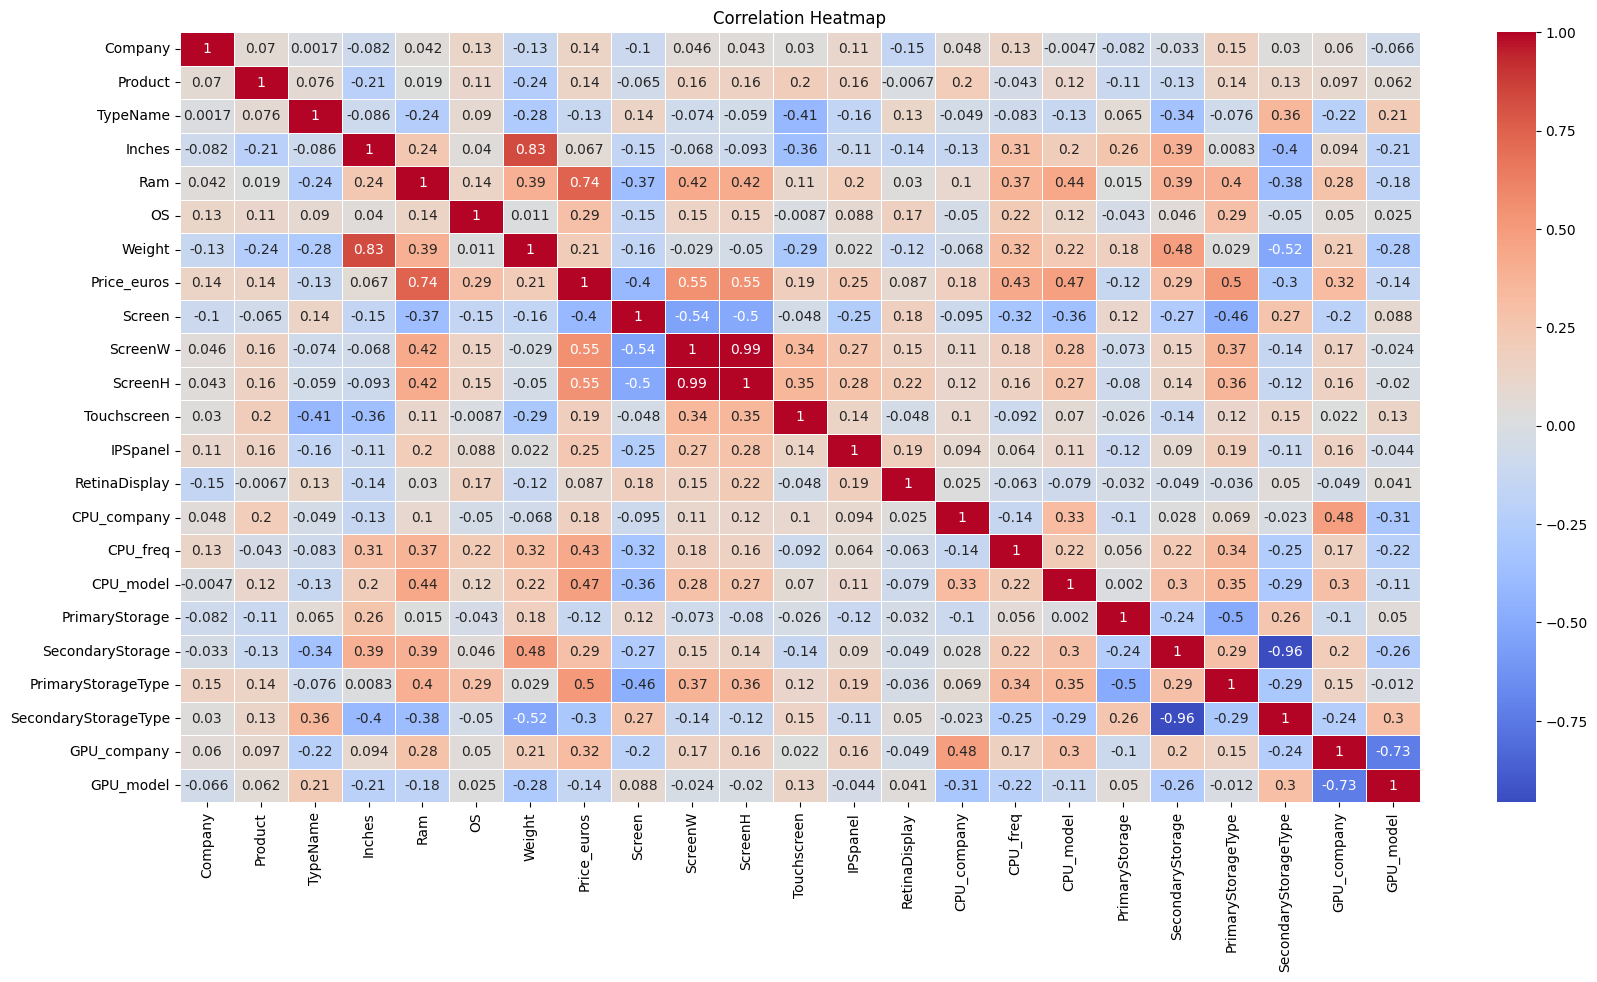

In [14]:
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(20 , 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()